<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/preAIO25/AIOCodeMathDA/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[AIO2025] LẬP TRÌNH - TOÁN - DATA ANALYSIS \
LÊ THỊ DIỄM MY

# Day 11: 2D List - Convolutional calculation

## Tích chập (Convolution)

$$
A = \begin{bmatrix}
 1&  2& 3 \\
 4&  5& 6 \\
 7&  8& 9
\end{bmatrix},
Kernal \text{ } B=\begin{bmatrix}
 2& 4 \\
 1& 3
\end{bmatrix} \\
Kernal \text{ } C = \begin{bmatrix}
 1&  1& 1 \\
 0&  0& 0 \\
 1&  1& 1
\end{bmatrix} \\
1. \text{ Hãy tính Convolutional khi áp dụng Kernal B vào A} \\
2. \text{ Hãy tính Convolutional khi áp dụng Kernal C vào A}
$$

In [209]:
def convolution(A, kernal):
  result = []
  for i in range(len(A)):
    row = []
    for j in range(len(A[0])):
      data_point = A[i][j]
      sum = 0
      if (i + len(kernal) <= len(A)) and (j + len(kernal[0]) <= len(A[0])): # prevent overflow
          for m in range(i, i + len(kernal)):
            for n in range(j, j + len(kernal[0])):
              sum += A[m][n] * kernal[m - i][n - j]
          row.append(sum)
    if row:
      result.append(row)
  return result


In [210]:
A = [[1,2,3],[4,5,6],[7,8,9]]
kernal_B = [[2,4],[1,3]]
conv_AB = convolution(A,kernal_B)

kernal_C = [[1,1,1],[0,0,0],[1,1,1]]
conv_AC = convolution(A,kernal_C)

In [211]:
import numpy as np

print(f"1. Convolution of A:\n {np.array(A)} \n with kernel B:\n {np.array(kernal_B)} \n is \n {np.array(conv_AB)}")
print(f"\n 2. Convolution of A:\n {np.array(A)} \n with kernel C:\n {np.array(kernal_C)} \n is \n {np.array(conv_AC)}")

1. Convolution of A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 
 with kernel B:
 [[2 4]
 [1 3]] 
 is 
 [[29 39]
 [59 69]]

 2. Convolution of A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]] 
 with kernel C:
 [[1 1 1]
 [0 0 0]
 [1 1 1]] 
 is 
 [[30]]


## Padding

$$
A = \begin{bmatrix}
 0&  0& 0 \\
 0&  4& 0 \\
 0&  1& 0
\end{bmatrix},
Kernal \text{ } B=\begin{bmatrix}
 1& 1 \\
 1& 1
\end{bmatrix} \\
Kernal \text{ } C = \begin{bmatrix}
 0&  1& 0 \\
 0&  1& 0 \\
 0&  1& 0
\end{bmatrix} \\
1. \text{ Hãy tính Convolutional khi áp dụng Kernal B vào A có sử dụng zero padding} \\
2. \text{ Hãy tính Convolutional khi áp dụng Kernal C vào A có sử dụng zero padding}
$$

In [212]:
def zero_padding(A):
  m_padding = [[0 for _ in range(len(A) + 2)] for _ in range(len(A[0]) + 2)]
  for i in range(len(m_padding)):#row
    for j in range(len(m_padding)): #column
        # add matrix A inside a new matrix
        should_add_matrix_a_element = (i >= 1) and (i < len(m_padding) - 1) and (j >= 1) and (j < len(m_padding[0]) - 1)
        if should_add_matrix_a_element:
          # print(f"ij{i},{j}, A: {A[i - 1][j - 1]}")
          m_padding[i][j] = A[i - 1][j - 1]
  # print(m_padding)
  return m_padding

In [213]:
A_test = [[1,2,3],[4,5,6],[7,8,9]]
zero_padding(A_test)

[[0, 0, 0, 0, 0],
 [0, 1, 2, 3, 0],
 [0, 4, 5, 6, 0],
 [0, 7, 8, 9, 0],
 [0, 0, 0, 0, 0]]

In [214]:
A = [[0,0,0],[0,4,0],[0,1,0]]
kernal_B = [[1,1],[1,1]]
kernal_C = [[0,1,0],[0,1,0],[0,1,0]]
A_zero_padding = zero_padding(A)

conv_AB = convolution(A_zero_padding, kernal_B)
conv_AC = convolution(A_zero_padding, kernal_C)

In [215]:
import numpy as np

print(f"1. Convolution of A:\n {np.array(A)} \n with kernel B with zero padding:\n {np.array(kernal_B)} \n is \n {np.array(conv_AB)}")
print(f"\n2. Convolution of A:\n {np.array(A)} \n with kernel B with zero padding:\n {np.array(kernal_C)} \n is \n {np.array(conv_AC)}")

1. Convolution of A:
 [[0 0 0]
 [0 4 0]
 [0 1 0]] 
 with kernel B with zero padding:
 [[1 1]
 [1 1]] 
 is 
 [[0 0 0 0]
 [0 4 4 0]
 [0 5 5 0]
 [0 1 1 0]]

2. Convolution of A:
 [[0 0 0]
 [0 4 0]
 [0 1 0]] 
 with kernel B with zero padding:
 [[0 1 0]
 [0 1 0]
 [0 1 0]] 
 is 
 [[0 4 0]
 [0 5 0]
 [0 5 0]]


## Max Pooling và Average Pooling

$$
A = \begin{bmatrix}
 0&  0&  0& 4 \\
 0&  4&  0& 2 \\
 0&  1&  0& 2 \\
 0&  3&  0& 2
\end{bmatrix}
$$

In [216]:
  def convolution_max_pooling(A, kernal, stride=1):
    result = []
    for i in range(0, len(A), stride): #row A
      row = []
      for j in range(0, len(A[0]), stride): #col A
        data_point = max = A[i][j]
        if (i + len(kernal) <= len(A)) and (j + len(kernal[0]) <= len(A[0])):
          for m in range(i, i + len(kernal)):
            for n in range(j, j + len(kernal[0])):
              if max < A[m][n]:
                max = A[m][n]
          row.append(max)
      if row:
        result.append(row)
    return result

In [217]:
def convolution_avg_pooling(A, kernal, stride=1):
    result = []
    num_elements_windowsize = len(kernal) * len(kernal[0])
    for i in range(0, len(A), stride): #row A
      row = []
      for j in range(0, len(A[0]), stride): #col A
        data_point = A[i][j]
        avg = 0
        if (i + len(kernal) <= len(A)) and (j + len(kernal[0]) <= len(A[0])):
          for m in range(i, i + len(kernal)):
            for n in range(j, j + len(kernal[0])):
              avg += A[m][n]
          row.append(float(avg / num_elements_windowsize))
      if row:
        result.append(row)
    return result

In [218]:
A = [[0,0,0,4],[0,4,0,2],[0,1,0,2],[0,3,0,2]]
kernal_B = [[1,1],[1,1]] #window size

conv_max_pooling = convolution_max_pooling(A, kernal_B, stride=2)
conv_avg_pooling = convolution_avg_pooling(A, kernal_B, stride=2)
print(f"Max pooling for A: {conv_max_pooling}")
print(f"Max pooling for A: {conv_avg_pooling}")

Max pooling for A: [[4, 4], [3, 2]]
Max pooling for A: [[1.0, 1.5], [1.0, 1.0]]


# Day 12: The Knight’s tour problem

## Bài tập


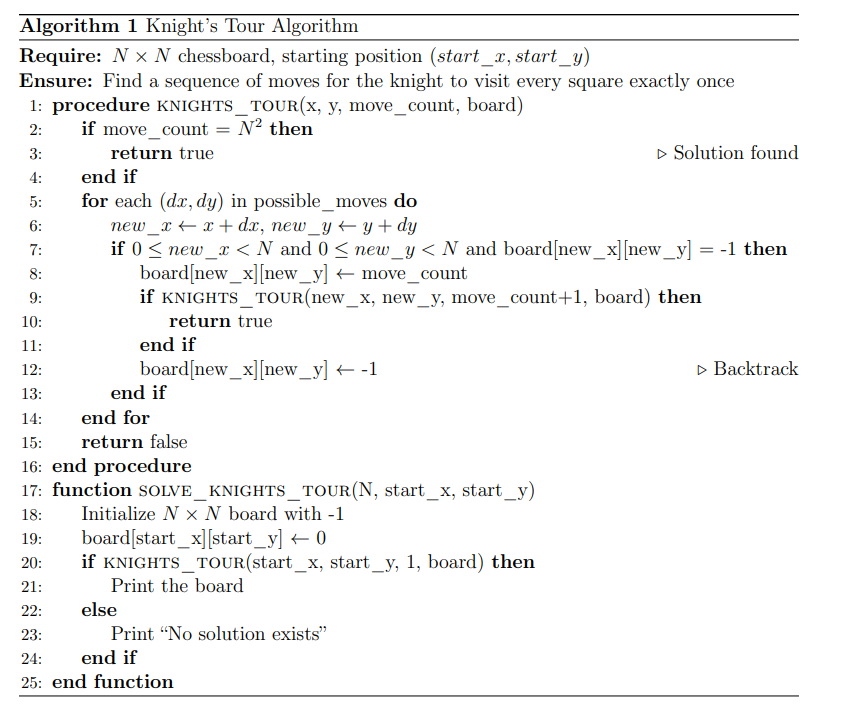

In [219]:
def solve_knight_tour(size_of_chessboard, start_x, start_y):
  #Create chessboard
  board = [[-1 for _ in range(size_of_chessboard)] for _ in range(size_of_chessboard)]
  board[start_x][start_y] = 0
  if knight_tour(start_x, start_y, 1, board, size_of_chessboard):
    print(board)
  else:
    print("No solution exist!")

In [220]:
def knight_tour(start_x, start_y, move_count, board, size_of_chessboard):
  if move_count == size_of_chessboard**2:
    return True # Solution found
  for dx in possible_moves:
    new_x = start_x + dx
    new_y = start_y + dy
    should_move = (new_x in [0, size_of_chessboard-1]) and \
                  (new_x in [0, size_of_chessboard-1]) and \
                  (board[new_x][new_y] == -1)
    if should_move:
      board[new_x][new_y] = move_count
      if knight_tour(new_x, new_y, move_count + 1, board, size_of_chessboard):
        return True
      board[new_x][new_y] = -1 # Backtrack
  return False

In [221]:
import numpy as np

n = 5 # size of chessboard
tests = [[0,0], [2,2]] # starting at (x, y)

print(f"Chest size ({n}x{n})")
for i, start in enumerate(tests):
  board = solve_knight_tour(n, start_x=start[0], start_y=start[1])
  print(f"{i+1}. The result of the knight's problem when starting at ({start[0]}, {start[1]}) is\n {np.array(board)}")

Chest size (5x5)


NameError: name 'possible_moves' is not defined

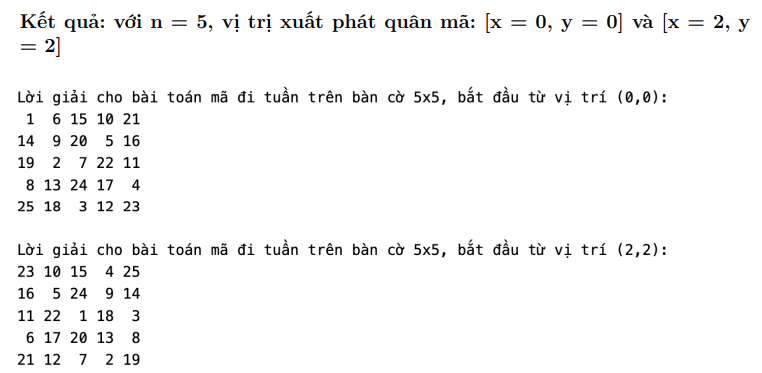

# Day 13

## Bài tập

# Day 14

## Bài tập

# Day 15

## Bài tập